In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt
sb.set()

pd.options.mode.chained_assignment = None

In [3]:
songData = pd.read_csv('/content/cleaned-song-dataset.csv')
songData

,Unnamed: 0,name,artists,popularity,release_date,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0,Keep A Song In Your Soul,['Mamie Smith'],12,1920-01-01,0.991000,0.598,168333.0,0.2240,0.0,0.000522,5.0,0.3790,-12.628,0.0,0.0936,149.976,0.6340
1,1,I Put A Spell On You,"[""Screamin' Jay Hawkins""]",7,1920-05-01,0.643000,0.852,150200.0,0.5170,0.0,0.026400,5.0,0.0809,-7.261,0.0,0.0534,86.889,0.9500
2,2,Golfing Papa,['Mamie Smith'],4,1920-01-01,0.993000,0.647,163827.0,0.1860,0.0,0.000018,0.0,0.5190,-12.098,1.0,0.1740,97.600,0.6890
3,3,True House Music - Xavier Santos & Carlos Gomi...,['Oscar Velazquez'],17,1920-01-01,0.000173,0.730,422087.0,0.7980,0.0,0.801000,2.0,0.1280,-7.311,1.0,0.0425,127.997,0.0422
4,4,Xuniverxe,['Mixe'],2,1920-01-10,0.295000,0.704,165224.0,0.7070,1.0,0.000246,10.0,0.4020,-6.036,0.0,0.0768,122.076,0.2990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82030,105886,Gangstas Need Love,"['Master P', 'Silkk The Shocker']",36,1997-01-01,0.124000,0.763,247640.0,0.8320,1.0,0.000000,6.0,0.0913,-6.005,1.0,0.2800,82.945,0.5680
82031,105887,Shut Up And Drive,['Chely Wright'],37,1997-01-01,0.444000,0.684,229307.0,0.4580,0.0,0.000034,8.0,0.0666,-9.635,1.0,0.0405,132.154,0.6300
82032,105888,Por Qué,['Eddie Gonzalez'],36,1997-01-01,0.275000,0.415,272307.0,0.5520,0.0,0.000000,3.0,0.1000,-6.004,1.0,0.0316,193.494,0.3320
82033,105889,The Portrait,['James Horner'],51,1997-01-01,0.995000,0.297,283227.0,0.0214,0.0,0.934000,5.0,0.0652,-32.398,1.0,0.0658,212.349,0.1320


# **Numerical Variables Analysis**

In [4]:
numericalSongData = songData[["popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]]

In [6]:
popularity = songData['popularity']
acousticness = songData['acousticness']
danceability = songData['danceability']
duration = songData['duration_ms']
energy = songData['energy']
explicit = songData['explicit']
instrumentalness = songData['instrumentalness']
key = songData['key']
liveness = songData['liveness']
loudness = songData['loudness']
mode = songData['mode']
speechiness = songData['speechiness']
tempo = songData['tempo']
valence = songData['valence']

Making Boxplots to analyze outliers

[Text(0.5, 1.0, 'valence')]

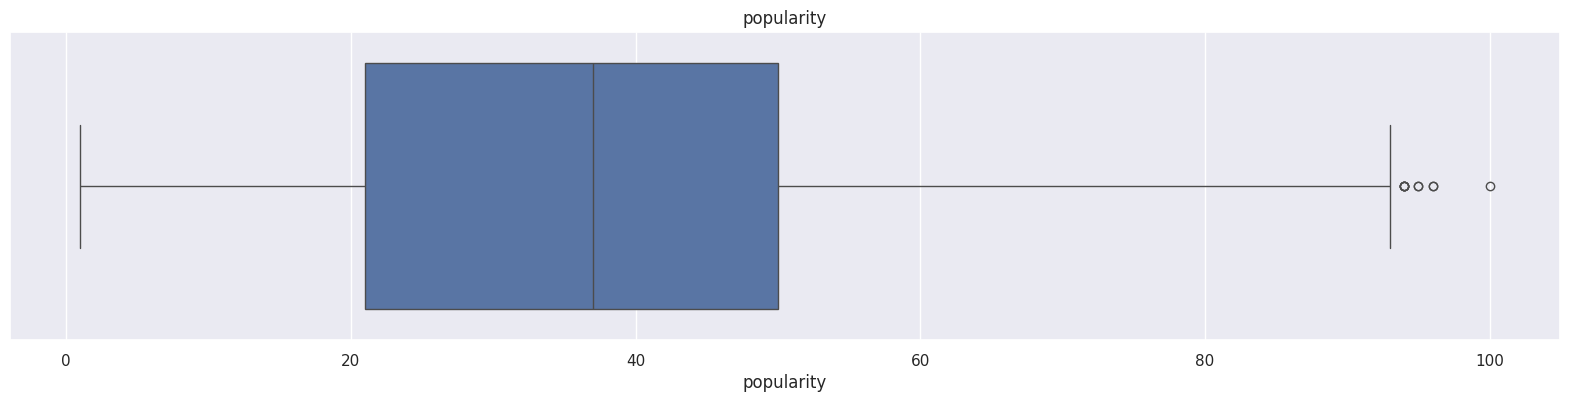

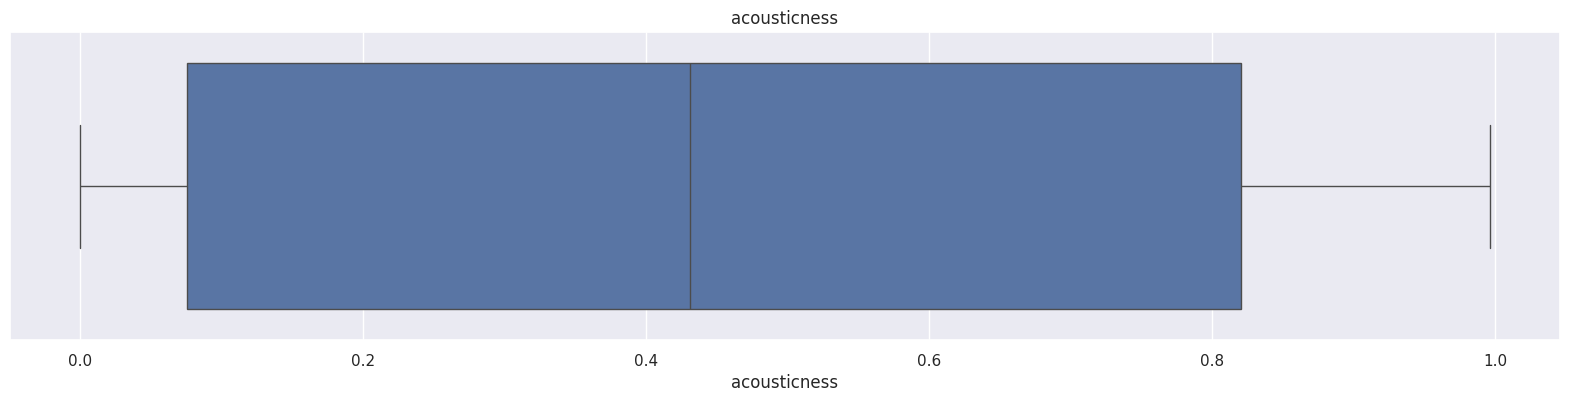

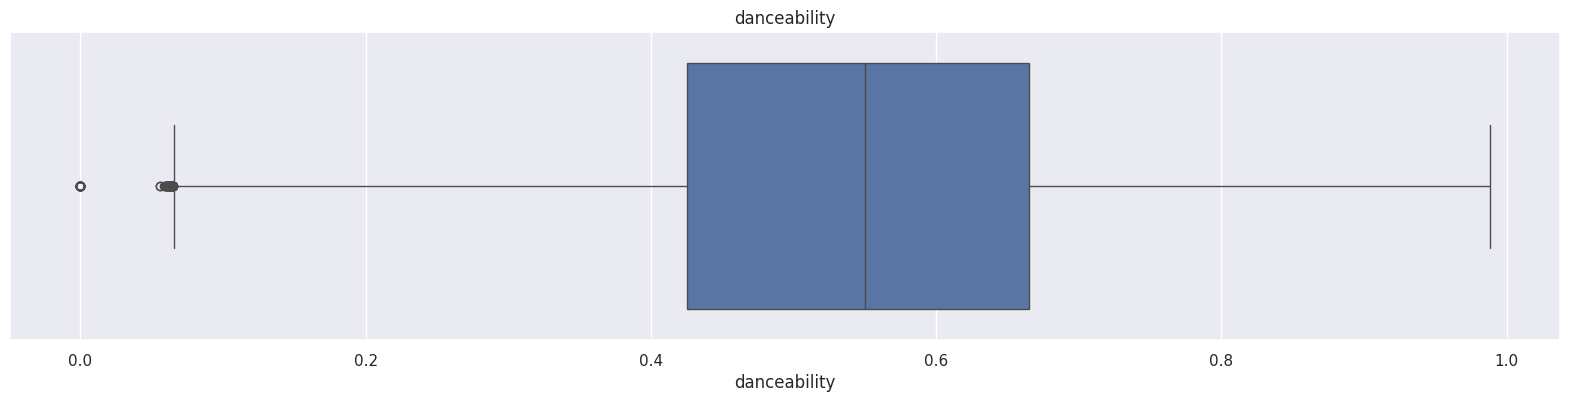

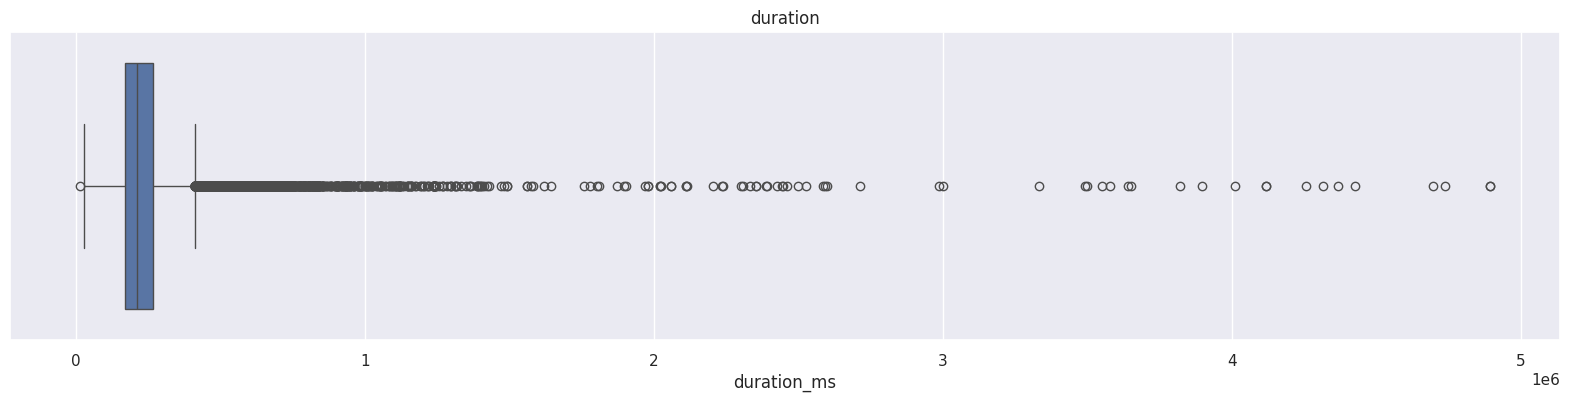

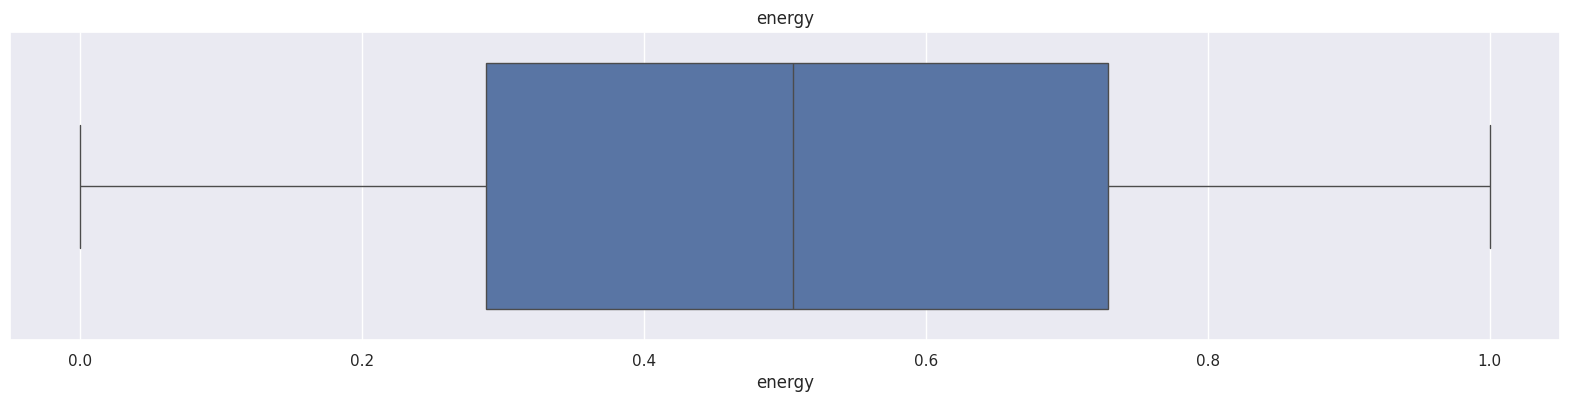

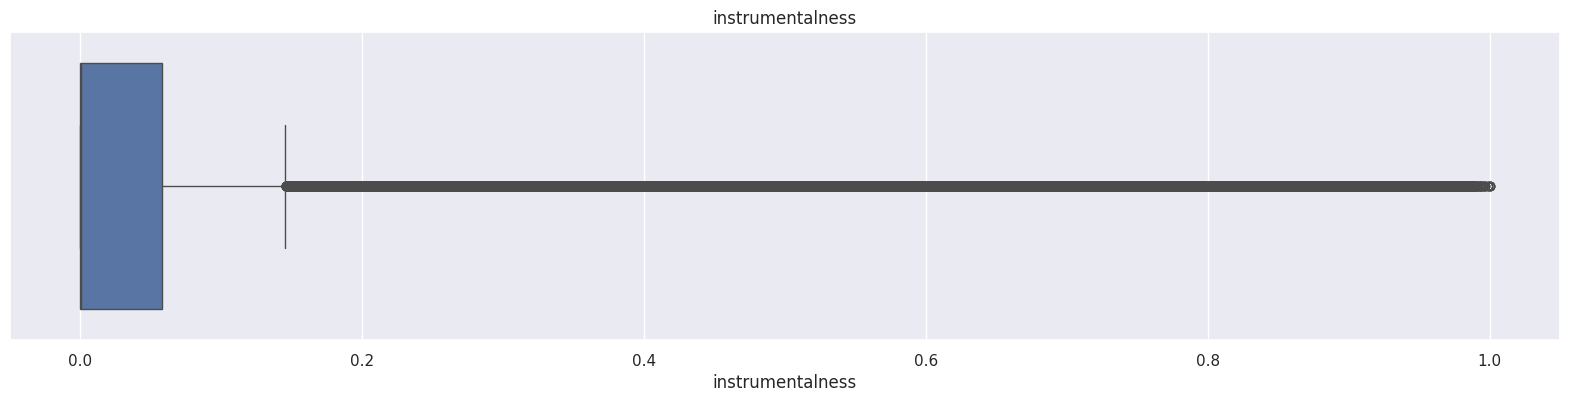

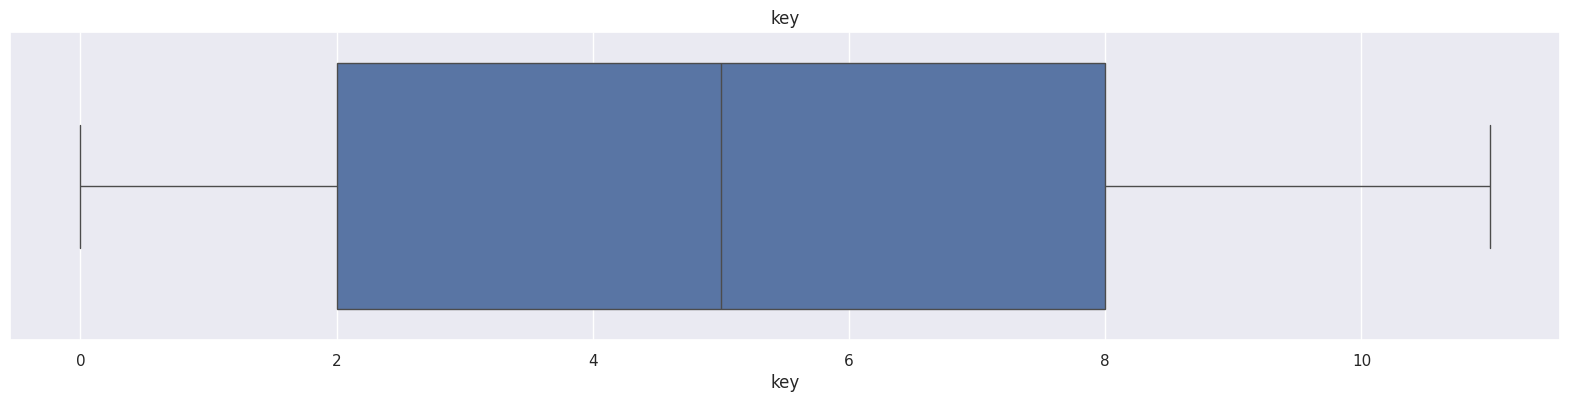

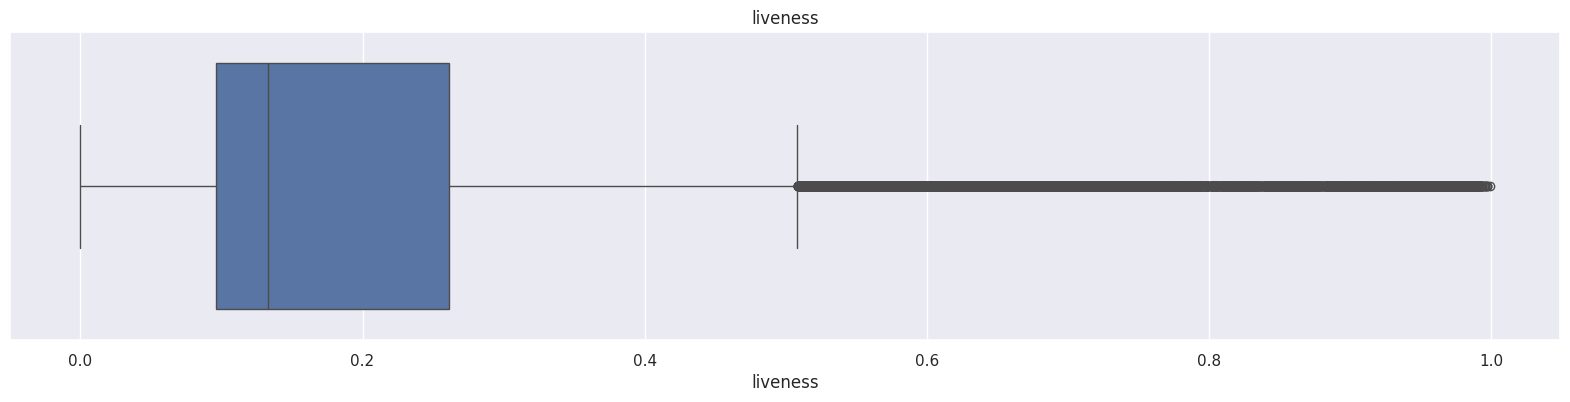

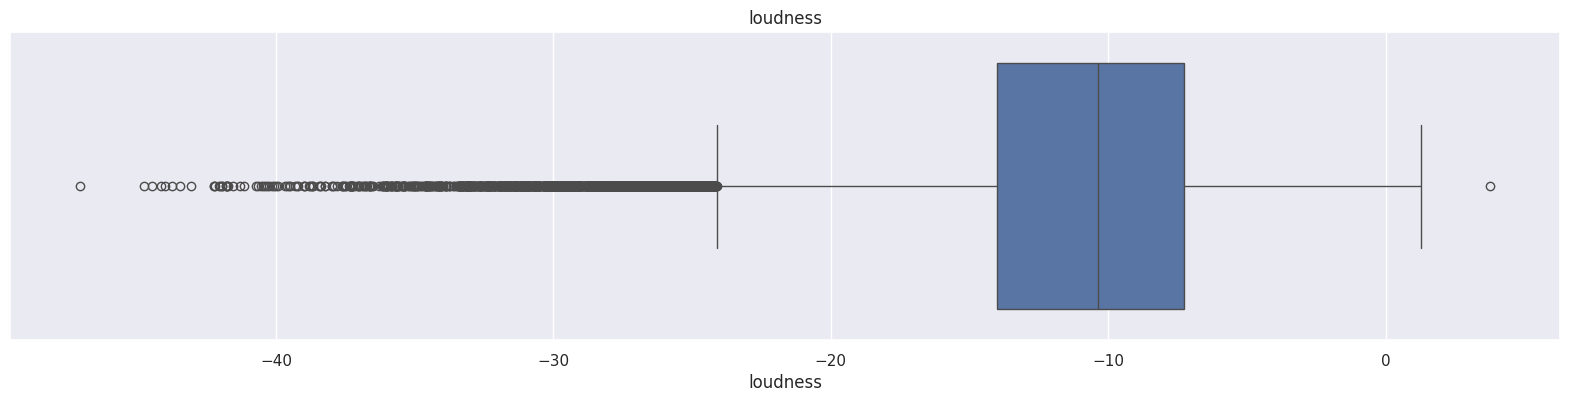

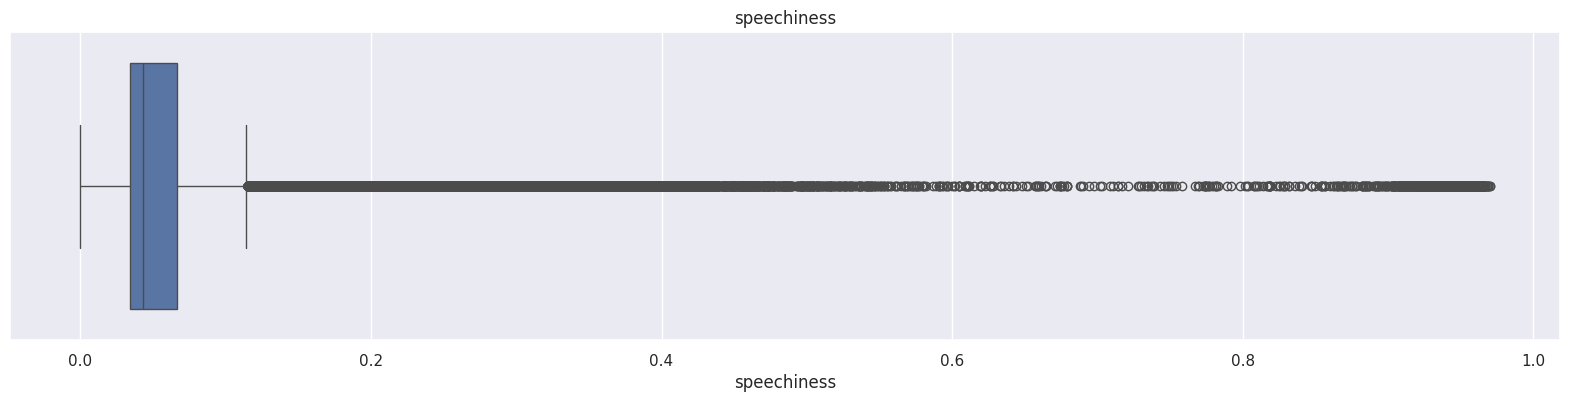

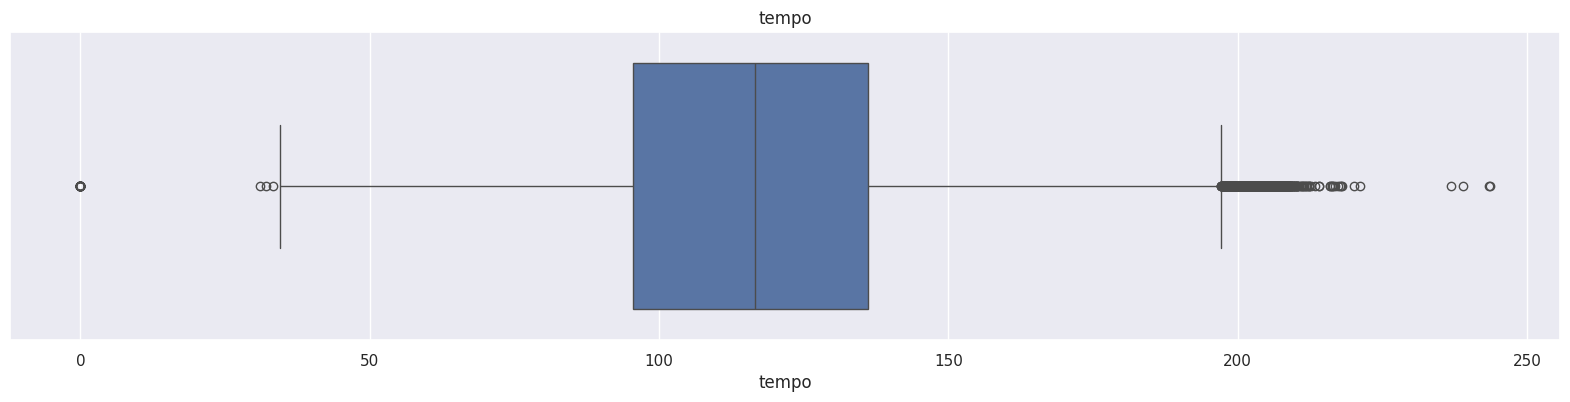

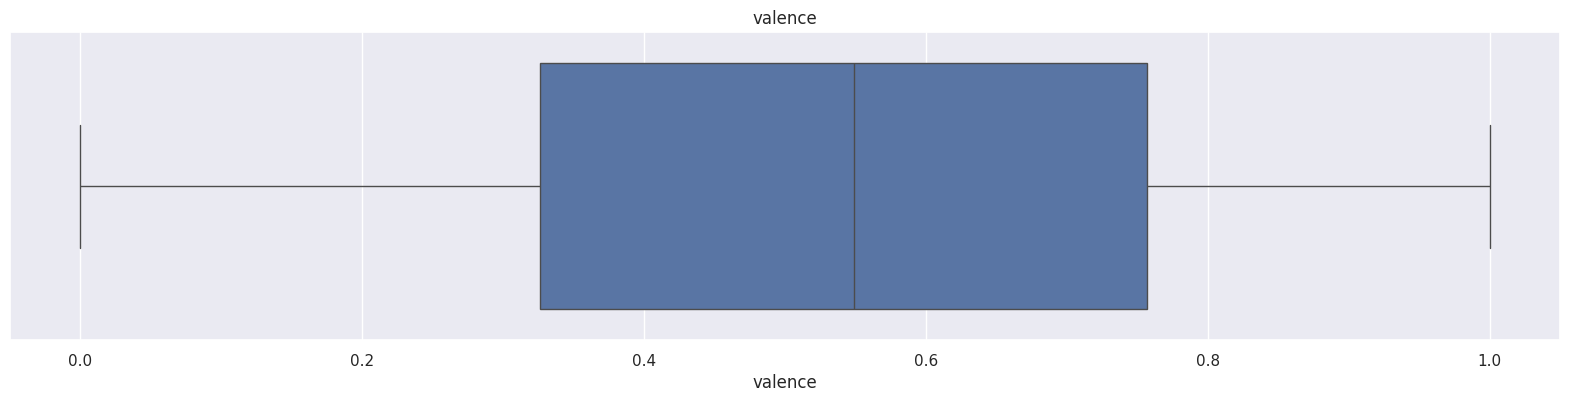

In [7]:
f = plt.figure(figsize = (20,4))
sb.boxplot(data = popularity, orient = 'h').set(title = 'popularity')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = acousticness, orient = 'h').set(title = 'acousticness')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = danceability, orient = 'h').set(title = 'danceability')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = duration, orient = 'h').set(title = 'duration')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = energy, orient = 'h').set(title = 'energy')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = instrumentalness, orient = 'h').set(title = 'instrumentalness')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = key, orient = 'h').set(title = 'key')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = liveness, orient = 'h').set(title = 'liveness')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = loudness, orient = 'h').set(title = 'loudness')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = speechiness, orient = 'h').set(title = 'speechiness')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = tempo, orient = 'h').set(title = 'tempo')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = valence, orient = 'h').set(title = 'valence')

In [8]:
def countOutlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    for i in df:
        if i > (Q3 + 1.5 * IQR) or i < (Q1 - 1.5 * IQR):
            count+=1
    return count

print("popularity has", countOutlier(popularity), "outliers.")
print("danceability has", countOutlier(danceability), "outliers.")
print("duration has", countOutlier(duration), "outliers.")
print("instrumentalness has", countOutlier(instrumentalness), "outliers.")
print("liveness has", countOutlier(liveness), "outliers.")
print("loudness has", countOutlier(loudness), "outliers.")
print("speechiness has", countOutlier(speechiness), "outliers.")
print("tempo has", countOutlier(tempo), "outliers.")

popularity has 10 outliers.
danceability has 78 outliers.
duration has 3812 outliers.
instrumentalness has 17630 outliers.
liveness has 5669 outliers.
loudness has 1913 outliers.
speechiness has 10670 outliers.
tempo has 840 outliers.


The outliers have been calculated as above. We have decided to set aside energy key acousticness and valence for convenience sake.

Now let's take a look at violin plots to see the distribution of numerical data.

Violin plots are utilized here for a comprehensive visualization of the distribution and density of numerical song attributes, facilitating comparisons, identifying peaks, skewness, and outlier detection across multiple variables simultaneously.

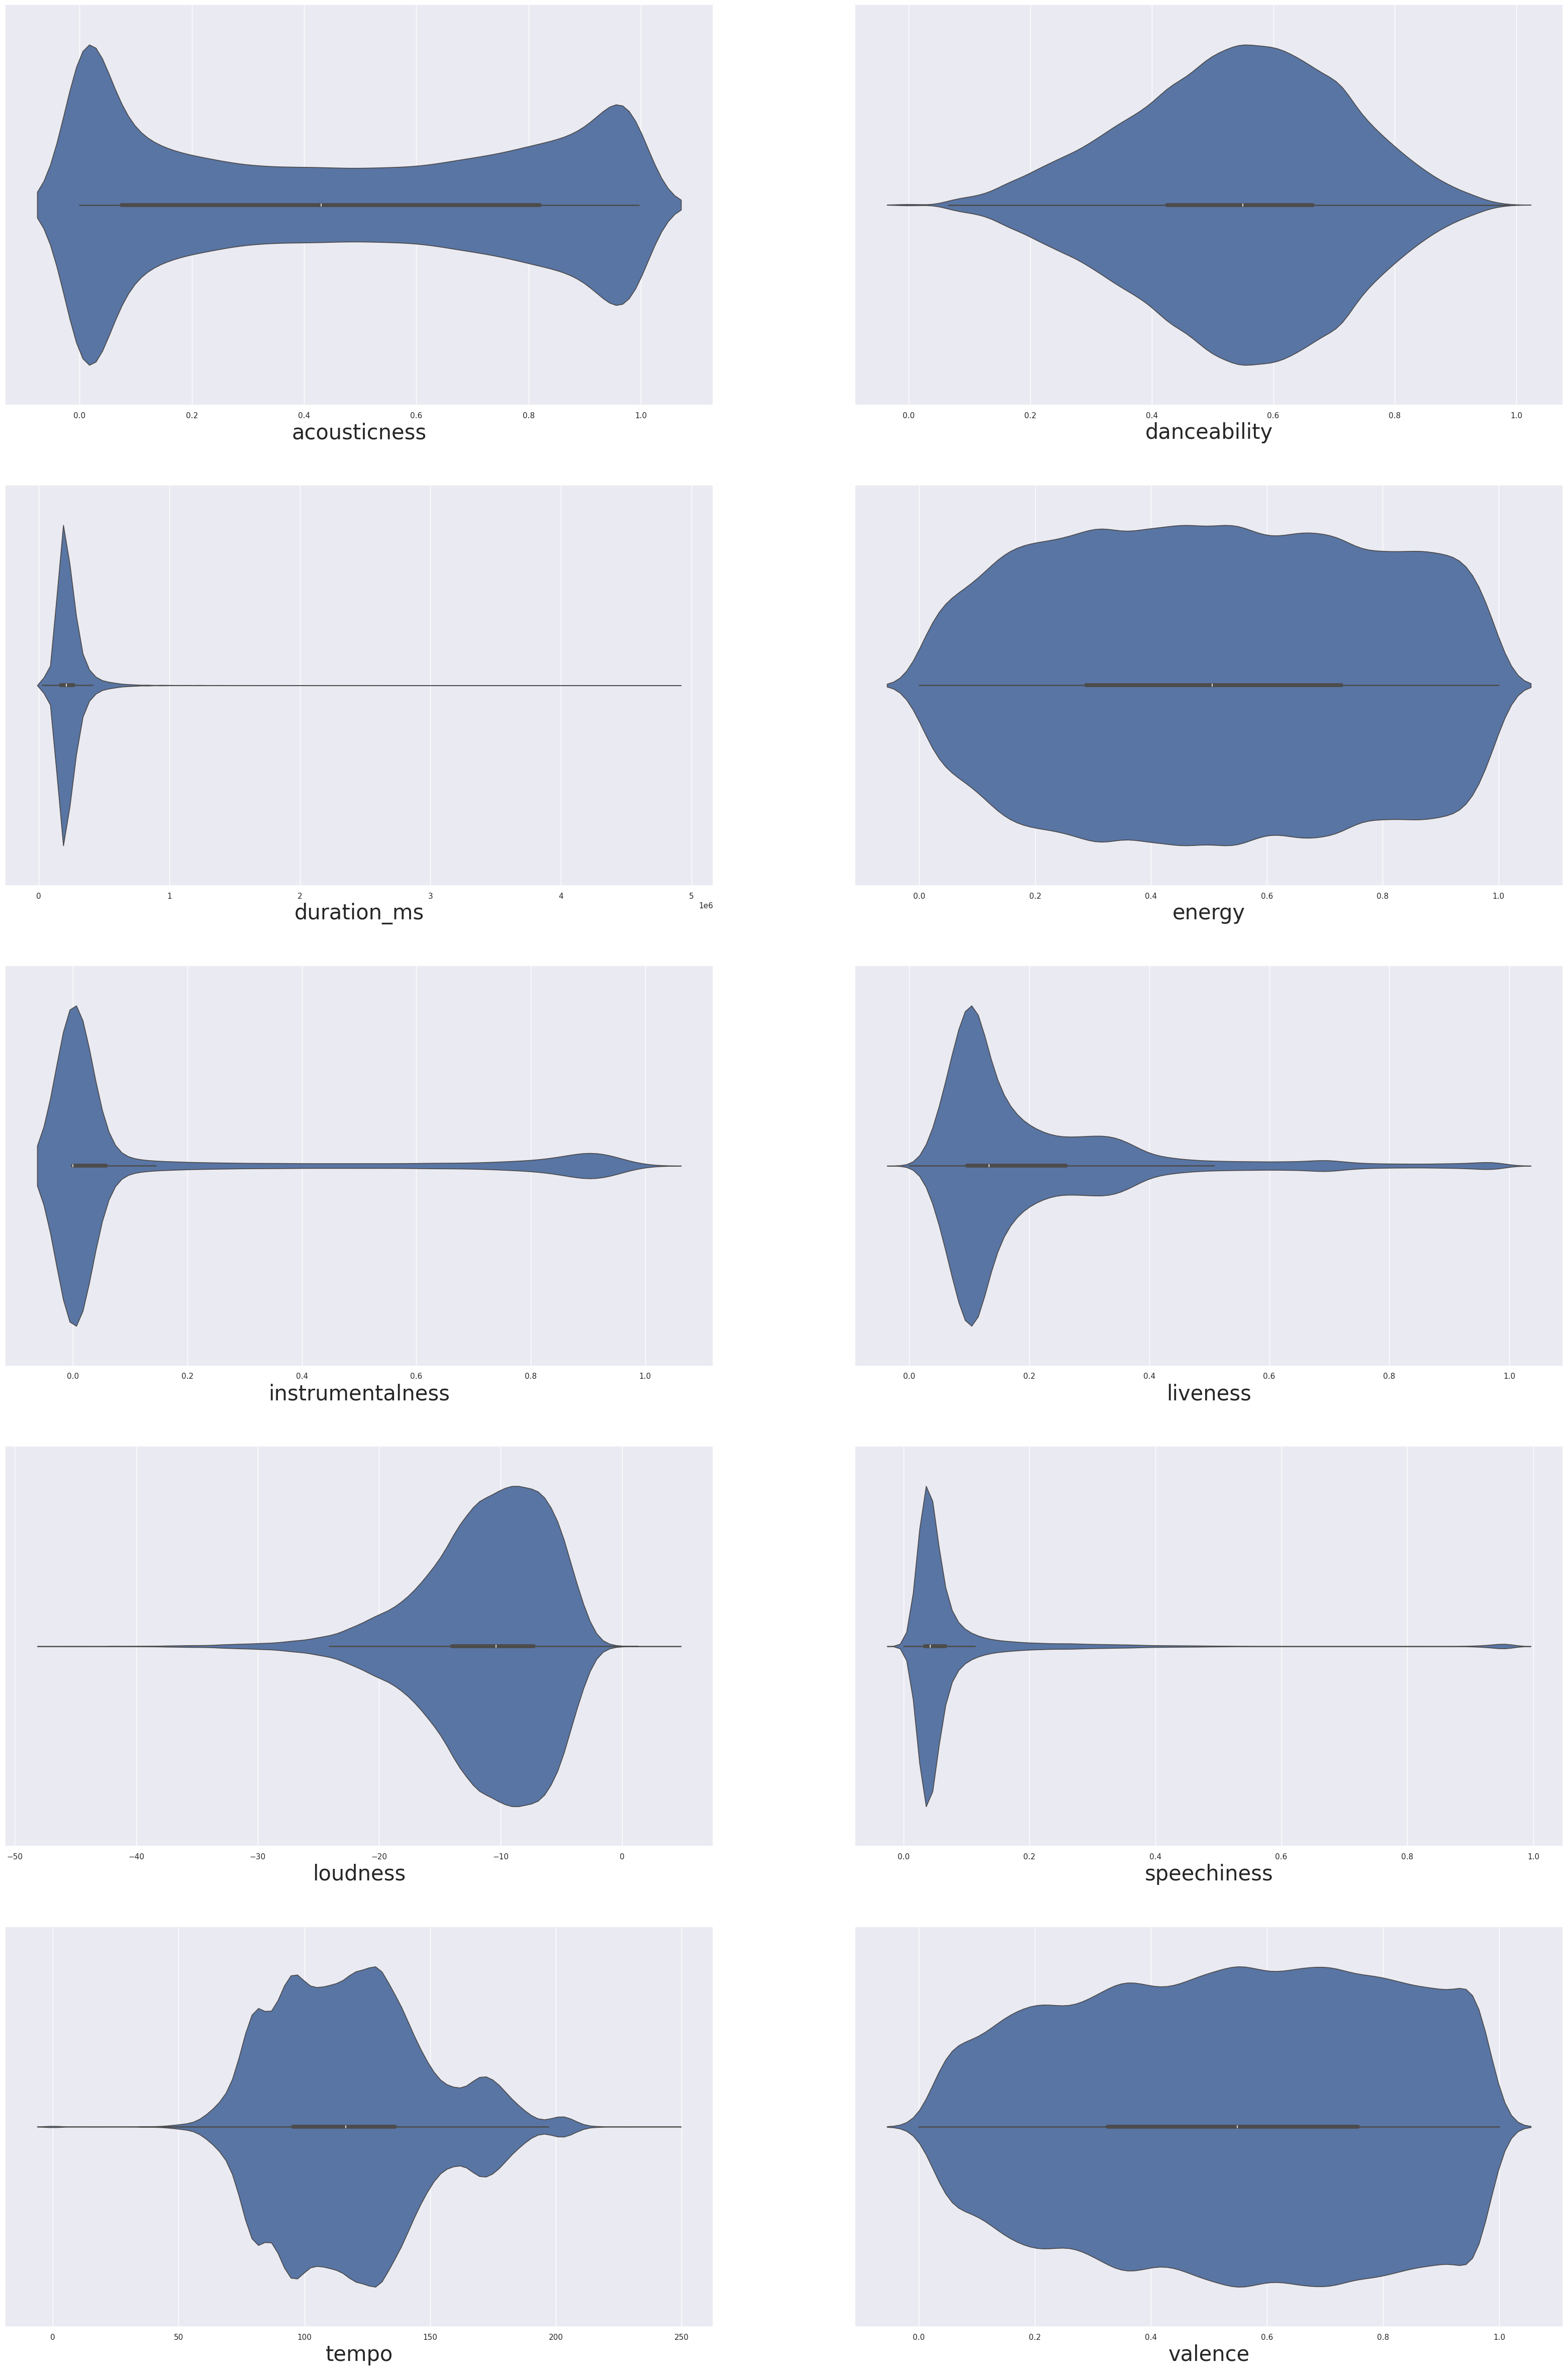

In [9]:
f, axes = plt.subplots(5,2,figsize = (40, 60))
count = 0
row = 0
numericalData = [x for x in numericalSongData.columns if x != 'popularity'] #want to look at popularity by itself later
for var in numericalData:
    if count % 2 == 0:
        col = 0
    else:
        col = 1
    sb.violinplot(data = numericalSongData[var], orient = "h", ax = axes[row, col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize = 30)
    count+=1
    if count % 2 ==0:
        row+=1

In [10]:
numericalSongData["popularity"].describe()

count    82035.000000
mean        35.747449
std         19.833410
min          1.000000
25%         21.000000
50%         37.000000
75%         50.000000
max        100.000000
Name: popularity, dtype: float64

Using the information above lets set a benchmark for a song to be considered popular. We will say if a song is above the 75th percentile value it is popular.

In [11]:
np.percentile(numericalSongData["popularity"], 75)

50.0

In [13]:
popularity_counts = (numericalSongData["popularity"] >= 50).value_counts()

print("Popularity:")
print("- Below 50:", popularity_counts[False])
print("- 50 or Above:", popularity_counts[True])

Popularity:
- Below 50: 61086
- 50 or Above: 20949


In [14]:
numericalSongData.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.390401,0.178844,0.064973,0.298544,-0.268860,-0.100973,0.333583,-0.102870,0.061000,0.062986
acousticness,-0.390401,1.000000,-0.231946,-0.089775,-0.763112,0.213145,-0.047375,-0.581923,-0.048663,-0.196980,-0.224889
danceability,0.178844,-0.231946,1.000000,-0.084018,0.195614,-0.229338,-0.112453,0.250414,0.196502,-0.042924,0.547063
duration_ms,0.064973,-0.089775,-0.084018,1.000000,0.035347,0.052482,0.039341,0.001182,-0.032441,-0.020323,-0.151635
energy,0.298544,-0.763112,0.195614,0.035347,1.000000,-0.177911,0.150842,0.781895,0.002804,0.245215,0.378630
instrumentalness,-0.268860,0.213145,-0.229338,0.052482,-0.177911,1.000000,-0.019311,-0.357226,-0.091137,-0.061136,-0.214017
liveness,-0.100973,-0.047375,-0.112453,0.039341,0.150842,-0.019311,1.000000,0.074252,0.135042,0.015540,-0.011172
loudness,0.333583,-0.581923,0.250414,0.001182,0.781895,-0.357226,0.074252,1.000000,-0.078979,0.194371,0.321367
speechiness,-0.102870,-0.048663,0.196502,-0.032441,0.002804,-0.091137,0.135042,-0.078979,1.000000,0.003674,0.021006
tempo,0.061000,-0.196980,-0.042924,-0.020323,0.245215,-0.061136,0.015540,0.194371,0.003674,1.000000,0.170250


<Axes: >

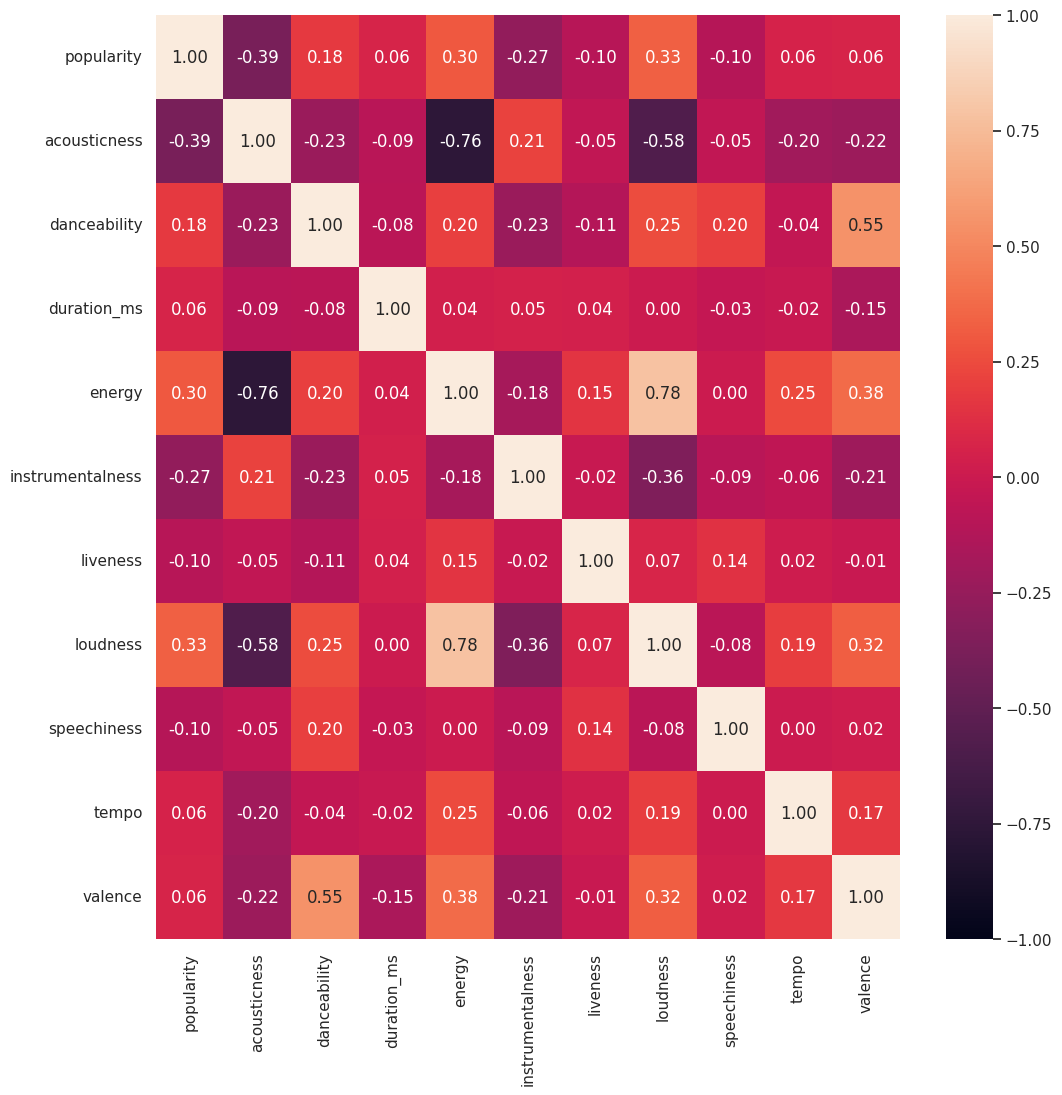

In [15]:
f = plt.figure(figsize = (12, 12))
sb.heatmap(numericalSongData.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

According to the heatmap, there is little association between popularity and the other characteristics; "acousticness" has the largest correlation, at -0.39. This indicates that their correlation with popularity is not very strong. However, a non-linear relationship with the other attributes might still exist.

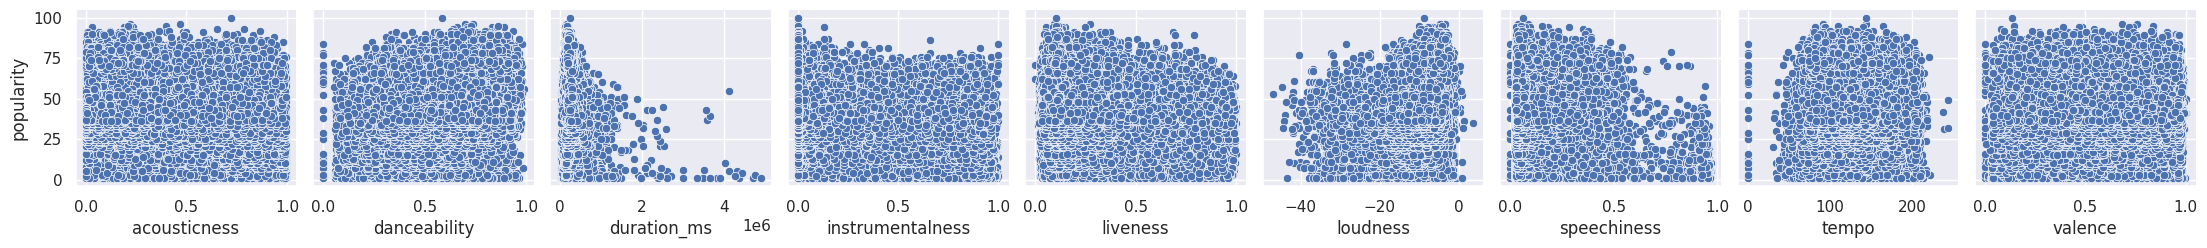

In [16]:
sb.pairplot(data = numericalSongData,
                    y_vars = ['popularity'],
                    x_vars = ['acousticness', 'danceability', 'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'])

This pairplot allows us to visualize the relationships between the popularity of songs and various numerical features such as acousticness, danceability, duration, instrumentalness, liveness, loudness, speechiness, tempo, and valence. It helps us identify any potential patterns or correlations between these features and the popularity of songs.








# **Analysis of Categorical Variables**

The categorical variables would be artist, release date, explicit, key, and mode

In [69]:
categoricalSongData = songData[["artists", "release_date", "explicit", "key", "mode", "popularity"]]
categoricalSongData

,artists,release_date,explicit,key,mode,popularity
0,['Mamie Smith'],1920-01-01,0.0,5.0,0.0,12
1,"[""Screamin' Jay Hawkins""]",1920-05-01,0.0,5.0,0.0,7
2,['Mamie Smith'],1920-01-01,0.0,0.0,1.0,4
3,['Oscar Velazquez'],1920-01-01,0.0,2.0,1.0,17
4,['Mixe'],1920-01-10,1.0,10.0,0.0,2
...,...,...,...,...,...,...
82030,"['Master P', 'Silkk The Shocker']",1997-01-01,1.0,6.0,1.0,36
82031,['Chely Wright'],1997-01-01,0.0,8.0,1.0,37
82032,['Eddie Gonzalez'],1997-01-01,0.0,3.0,1.0,36
82033,['James Horner'],1997-01-01,0.0,5.0,1.0,51


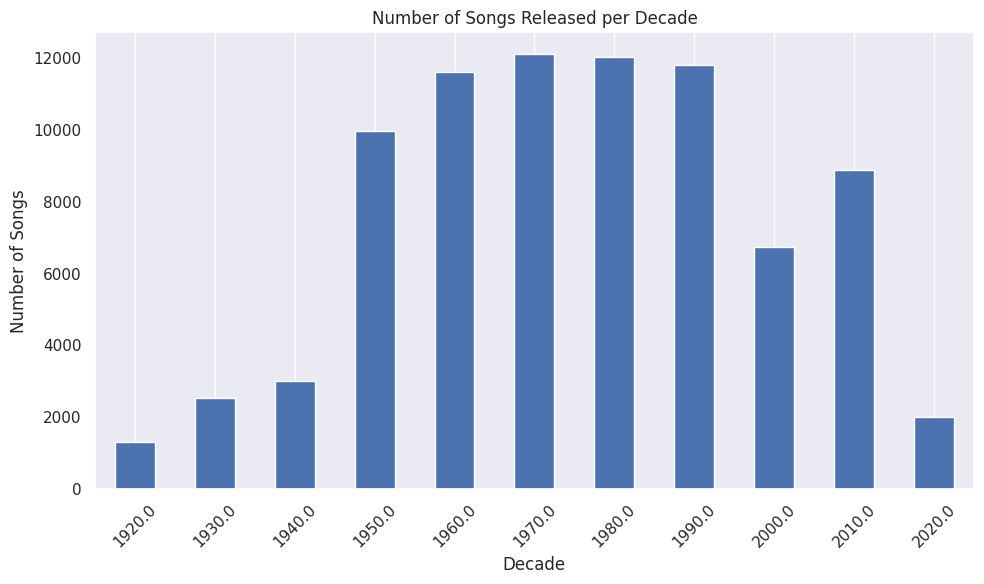

decade
1920.0     1307
1930.0     2535
1940.0     3012
1950.0     9970
1960.0    11610
1970.0    12114
1980.0    12038
1990.0    11804
2000.0     6749
2010.0     8881
2020.0     2014
Name: count, dtype: int64

In [70]:

categoricalSongData['release_date'] = pd.to_datetime(categoricalSongData['release_date'], errors='coerce')

categoricalSongData['year'] = categoricalSongData['release_date'].dt.year

categoricalSongData['decade'] = (categoricalSongData['year'] // 10) * 10

decade_distribution = categoricalSongData['decade'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
decade_distribution.plot(kind='bar')
plt.title('Number of Songs Released per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


decade_distribution





With the incoming of modern songs it is expected, especially on a modern application like spotify, that old music is not as popular and newly released songs will be considered less popular as they wouldn't have as many plays.

In [71]:
categoricalSongData["artists"].value_counts()

artists
['Frank Sinatra']                                                   496
['The Beatles']                                                     365
['Billie Holiday']                                                  365
['Georgette Heyer', 'Irina Salkow']                                 348
['The Rolling Stones']                                              334
                                                                   ... 
['George L. TeLeaman', 'Lord Alfred Tennyson', 'The Chordettes']      1
['Robert Shafer', 'Stephen Douglass']                                 1
['Sid King & The Five Strings']                                       1
['Spike Jones', 'City Slickers']                                      1
['B.B. King', 'Paul Carrack']                                         1
Name: count, Length: 17795, dtype: int64

As there are too many artists we may not use this metric.

Now check the categorical variables against the popularity of the songs

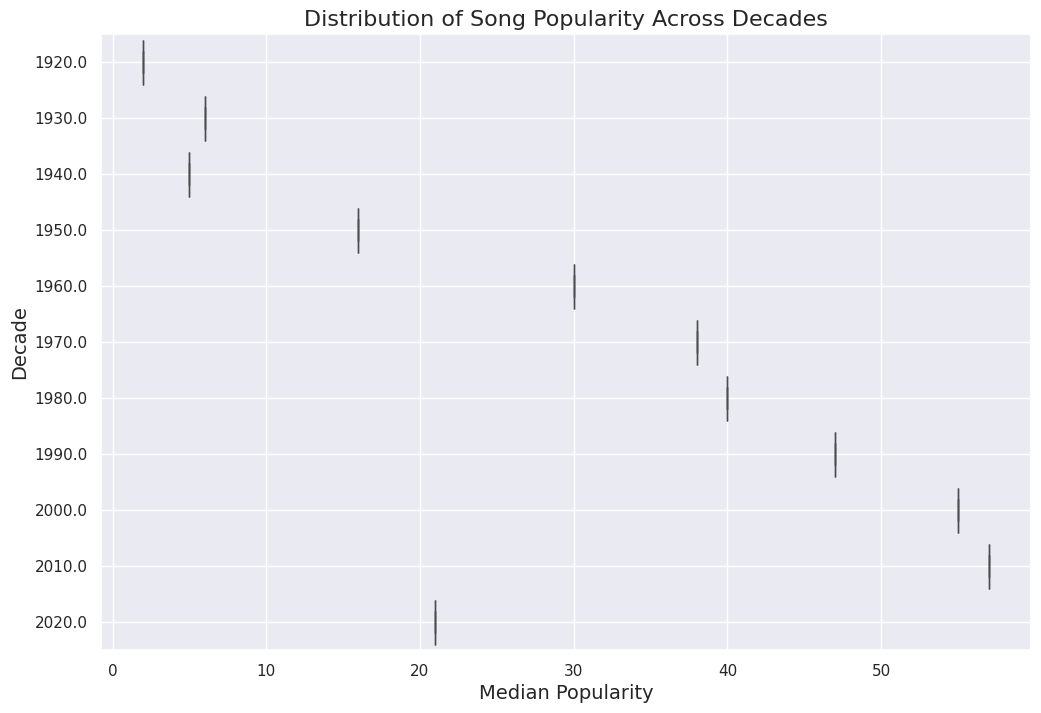

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by decade and calculating the median popularity for each decade
decade_popularity = categoricalSongData.groupby((categoricalSongData['release_date'].dt.year // 10) * 10)['popularity'].median()

# Resetting the index to convert the groupby result into a DataFrame
decade_popularity = decade_popularity.reset_index()

# Renaming the columns for clarity
decade_popularity.columns = ['Decade', 'Median Popularity']

# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Median Popularity', y='Decade', data=decade_popularity, orient='h')
plt.xlabel('Median Popularity', fontsize=14)
plt.ylabel('Decade', fontsize=14)
plt.title('Distribution of Song Popularity Across Decades', fontsize=16)
plt.grid(True)
plt.show()


In [84]:
categoricalSongData["explicit"].value_counts()

explicit
0.0    77010
1.0     5024
Name: count, dtype: int64

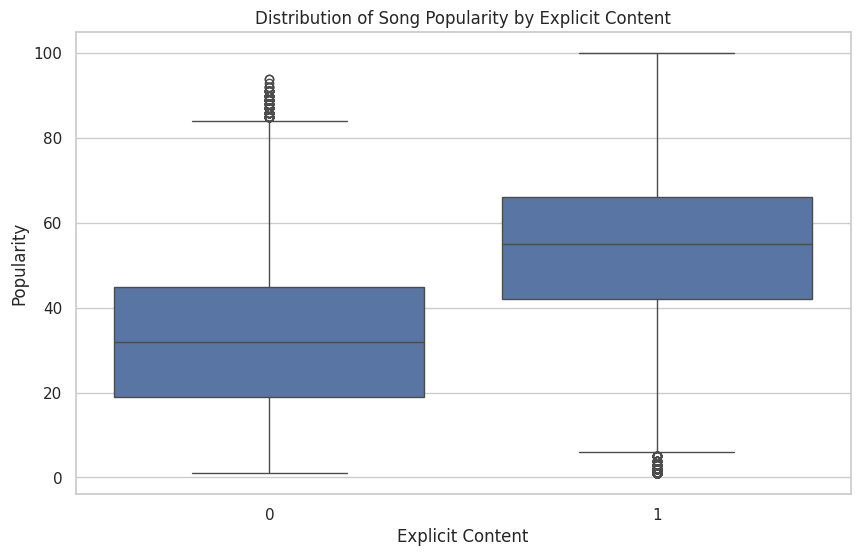

In [81]:

data['explicit'] = data['explicit'].astype('category')


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='explicit', y='popularity', data=data)


boxplot.set_title('Distribution of Song Popularity by Explicit Content')
boxplot.set_xlabel('Explicit Content')
boxplot.set_ylabel('Popularity')


plt.show()

People seem to like explicit songs more than non-explicit ones.

<ipython-input-82-62da11b5446d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='key', y='popularity', data=data, palette="vlag")


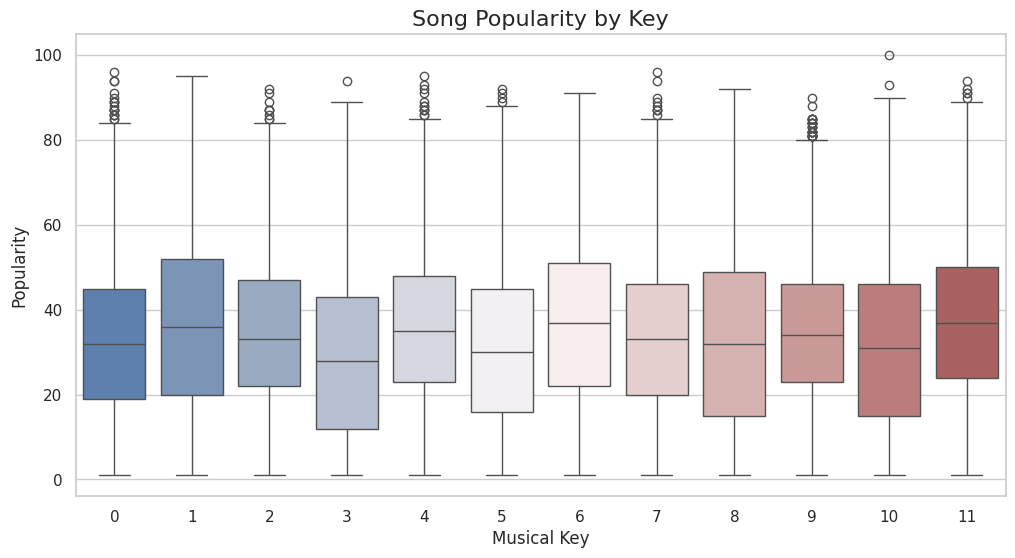

In [82]:
data['key'] = data['key'].astype('category')


sns.set_style('whitegrid')

f, ax = plt.subplots(figsize=(12, 6))


sns.boxplot(x='key', y='popularity', data=data, palette="vlag")

ax.set_title('Song Popularity by Key', fontsize=16)
ax.set_xlabel('Musical Key', fontsize=12)
ax.set_ylabel('Popularity', fontsize=12)


plt.show()

The graph suggests that the musical key of a song does not have a significant impact on its popularity, as indicated by the similar median popularity and range of scores across different keys, along with the presence of outliers in all categories.

<ipython-input-83-f85711479d99>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mode', y='popularity', data=data, palette="muted")


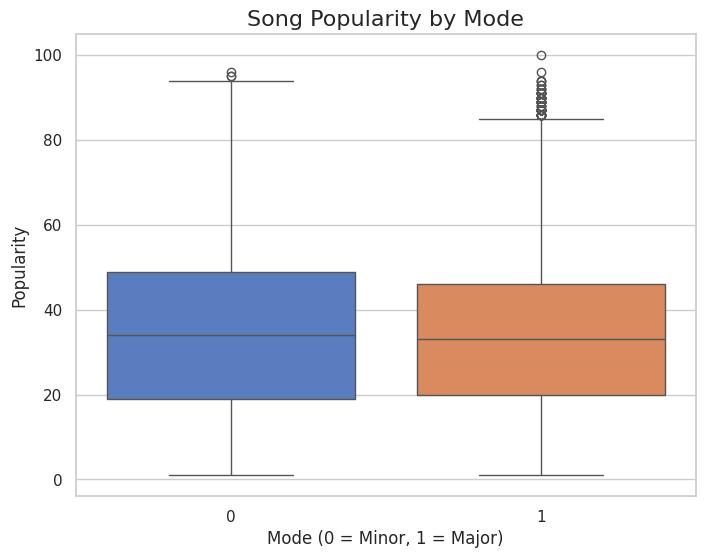

In [83]:

sns.set_style('whitegrid')

f, ax = plt.subplots(figsize=(8, 6))


data['mode'] = data['mode'].astype('category')


sns.boxplot(x='mode', y='popularity', data=data, palette="muted")


ax.set_title('Song Popularity by Mode', fontsize=16)
ax.set_xlabel('Mode (0 = Minor, 1 = Major)', fontsize=12)
ax.set_ylabel('Popularity', fontsize=12)


plt.show()


The graph shows that songs in both major and minor modes have a similar range of popularity with a slight tendency for songs in a major mode to have higher median popularity, although mode does not seem to be a decisive factor for song popularity.

With this we have completed all modes of visualization through categorical factors.